# Homework 6
## Due:  Tuesday, October 10 at 11:59 PM

# Problem 1: Bank Account Revisited

We are going to rewrite the bank account closure problem we had a few assignments ago, only this time developing a formal class for a Bank User and Bank Account to use in our closure (recall previously we just had a nonlocal variable amount that we changed). 

### Some Preliminaries:
First we are going to define two types of bank accounts.  Use the code below to do this:

In [2]:
from enum import Enum
class AccountType(Enum):
    SAVINGS = 1
    CHECKING = 2

An Enum stands for an enumeration, it's a convenient way for you to define lists of things. Typing:

In [3]:
AccountType.SAVINGS

<AccountType.SAVINGS: 1>

returns a Python representation of an enumeration. You can compare these account types:

In [4]:
AccountType.SAVINGS == AccountType.SAVINGS

True

In [5]:
AccountType.SAVINGS == AccountType.CHECKING

False

To get a string representation of an Enum, you can use:

In [6]:
AccountType.SAVINGS.name

'SAVINGS'

### Part 1: Create a BankAccount class with the following specification:

Constructor is `BankAccount(self, owner, accountType)` where `owner` is a string representing the name of the account owner and `accountType` is one of the AccountType enums

Methods `withdraw(self, amount)` and `deposit(self, amount)` to modify the account balance of the account

Override methods `__str__` to write an informative string of the account owner and the type of account, and `__len__` to return the balance of the account

In [59]:
class BankAccount():
    def __init__(self, owner, accountType):
        self.owner = owner
        self.accountType = accountType
        self.balance = 0
    
    def withdraw(self, amount):
        #Check for sufficient funds
        if(amount < 0):
            raise ValueError("Withdrawl amount must be positive")
        if(amount > self.balance):
            raise ValueError("Not sufficent funds for transaction! Balance = ",
                             self.balance, "and withdraw requested = ", amount)
        self.balance = self.balance - amount
        
    def deposit(self,amount):
        self.balance = self.balance + amount
        
    def __str__(self):
        return "{} has a {}.".format(self.owner, self.accountType.name)
    
    def __len__(self):
        class_name = type(self).__name__
        return "Balance of the account is: {: d}".format(class_name, self)

### Part 2:  Write a class BankUser with the following specification:

Constructor `BankUser(self, owner)` where `owner` is the name of the account.

Method `addAccount(self, accountType)` - to start, a user will have no accounts when the BankUser object is created. `addAccount` will add a new account to the user of the `accountType` specified. **Only one savings/checking account per user, return appropriate error otherwise**

Methods `getBalance(self, accountType)`, `deposit(self, accountType, amount)`, and `withdraw(self, accountType, amount)` for a specific AccountType.

Override `__str__` to have an informative summary of user's accounts.

In [76]:
class BankUser():
    def __init__(self,owner):
        self.owner = owner
    
    def addAccount(self,accountType):
        #check if accountype already exists or create it
        if (accountType.value == 1):
            try:
                self.savingsAccount
                raise ValueError("An savings account already exists!")
            except AttributeError:
                self.savingsAccount = BankAccount(self.owner,accountType)
        if (accountType.value == 2):
            try:
                self.checkingsAccount
                raise ValueError("An checkings account already exists!")
            except AttributeError:
                self.checkingsAccount = BankAccount(self.owner,accountType)
    
    def deposit(self, accountType, amount):
        if (accountType.value == 1):
            try:
                self.savingsAccount
                self.savingsAccount.deposit(amount)
            except AttributeError:
                raise AttributeError("No savings account associated with this owner")
                
        if (accountType.value == 2):
            try:
                self.checkingsAccount
                self.checkingsAccount.deposit(amount)
            except AttributeError:
                raise AttributeError("No checkings account associated with this owner")
    
    def withdraw(self, accountType, amount):
        #check positivity of withdrawl amount
        if(amount < 1):
            raise ValueError("Withdrawl amount must be positive")
            
        if (accountType.value == 2):
            try:
                self.checkingsAccount
                if(amount > self.checkingsAccount.balance):
                    raise ValueError("Not sufficent funds for transaction! Balance = ",
                                     self.balance, "and withdraw requested = ", amount)
                self.checkingsAccount.withdraw(amount)
            except AttributeError:
                raise AttributeError("No checkings account associated with this owner")
    
    def getBalance(self, accountType):
        if (accountType.value == 1):
            try:
                self.savingsAccount
                return self.savingsAccount.balance
            except AttributeError:
                raise AttributeError("No savings account associated with this owner")
                
        if (accountType.value == 2):
            try:
                self.checkingsAccount
                return self.checkingsAccount.balance
            except AttributeError:
                raise AttributeError("No checkings account associated with this owner")
    def __str__(self):
        try:
            self.savingsAccount
            savings = "Savings account has {: d} funds".format(self.savingsAccount.balance)
        except AttributeError:
            savings = "No savings account"
        try:
            self.checkingsAccount
            checkings = "Savings account has {: d} funds".format(self.savingsAccount.balance)
        except AttributeError:
            checkings = "No savings account"
        return "{} has {} funds.".format(savings, checkings)

In [77]:
def test_addAccountMultipleCheckings():
    try:
        user = BankUser("riddhi")
        user.addAccount(AccountType.CHECKING)
        user.addAccount(AccountType.CHECKING)
    except ValueError as err:
        assert(type(err) == ValueError)

def test_addAccountMultipleSavings():
    try:
        user = BankUser("riddhi")
        user.addAccount(AccountType.SAVINGS)
        user.addAccount(AccountType.SAVINGS)
    except ValueError as err:
        assert(type(err) == ValueError)

def test_addAccountSavings():
    user = BankUser("riddhi")
    user.addAccount(AccountType.SAVINGS)
    assert(type(user.savingsAccount) == BankAccount)

def test_addAccountCheckings():
    user = BankUser("riddhi")
    user.addAccount(AccountType.CHECKING)
    assert(type(user.checkingsAccount) == BankAccount)

def test_noSavingsDeposit():
    try:
        user = BankUser("riddhi")
        user.deposit(AccountType.SAVINGS,100)
    except AttributeError as err:
        assert(type(err) == AttributeError)
        
def test_noCheckingsDeposit():
    try:
        user = BankUser("riddhi")
        user.deposit(AccountType.CHECKING,100)
    except AttributeError as err:
        assert(type(err) == AttributeError)

def test_deposit():
    user = BankUser("riddhi")
    user.addAccount(AccountType.SAVINGS)
    user.deposit(AccountType.SAVINGS,100)
    assert(user.getBalance(AccountType.SAVINGS) == 100)

def test_LackOfFunds():
    try:
        user = BankUser("riddhi")
        user.addAccount(AccountType.SAVINGS)
        user.deposit(AccountType.SAVINGS,100)
        user.withdraw(AccountType.SAVINGS,200)
    except ValueError as err:
        assert(type(err) == ValueError)


test_addAccountCheckings()
test_addAccountSavings()
test_addAccountMultipleCheckings()
test_addAccountMultipleSavings()
test_deposit()
test_noCheckingsDeposit()
test_noSavingsDeposit()
test_LackOfFunds()

Write some simple tests to make sure this is working. Think of edge scenarios a user might try to do.

### Part 3:  ATM Closure

Finally, we are going to rewrite a closure to use our bank account. We will make use of the [input function](http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/io.html) which takes user input to decide what actions to take.

Write a closure called ATMSession(bankUser) which takes in a BankUser object. Return a method called Interface that when called, would provide the following interface:

First screen for user will look like:


**Enter Option:**

**1)Exit**

**2)Create Account**

**3)Check Balance**

**4)Deposit**

**5)Withdraw**


Pressing 1 will exit, any other option will show the options:



**Enter Option:**

**1)Checking**

**2)Savings**


If a deposit or withdraw was chosen, then there must be a third screen:



**Enter Integer Amount, Cannot Be Negative:**

This is to keep the code relatively simple, if you'd like you can also curate the options depending on the BankUser object (for example, if user has no accounts then only show the Create Account option), but this is up to you. In any case, you must handle any input from the user in a reasonable way that an actual bank would be okay with, and give the user a proper response to the action specified.

Upon finishing a transaction or viewing balance, it should go back to the original screen

In [58]:
def ATMSession(bankUser):
    def interface():
        while(True):
            inputMessage1 = 'Enter Option: \n 1)Exit \n 2)Create Account \n 3)Check Balance \n 4)Deposit \n 5)Withdraw \n'
            answer = input(inputMessage1)
            if (int(answer) == 1):
                break
            elif (int(answer) == 2):
                inputMessage2 = 'Enter Option: \n 1)Checkings \n 2)Savings \n'
                accountAns = input(inputMessage2)
                if(int(accountAns) == 2):
                    try:
                        bankUser.addAccount(AccountType.SAVINGS)
                        print("A savings account was created")
                        next
                    except ValueError:
                        print("Savings account already exists.")
                        next
                else:
                    try:
                        bankUser.addAccount(AccountType.CHECKING)
                        print("A checkings account was created")
                        next
                    except ValueError:
                        print("Checkings account already exists.")
                        next
            elif (int(answer) == 3):
                inputMessage2 = 'Enter Option: \n 1)Checkings \n 2)Savings \n'
                accountAns = input(inputMessage2)
                if(int(accountAns) == 2):
                    try:
                        balance = bankUser.getBalance(AccountType.SAVINGS)
                        print("Your current savings balance is ", balance)
                        next
                    except AttributeError: 
                        print("You do not have a savings account!")
                        next
                else:
                    try:
                        balance = bankUser.getBalance(AccountType.CHECKING)
                        print("Your current savings balance is ", balance)
                        next
                    except AttributeError: 
                        print("You do not have a checkings account!")
                        next
            elif (int(answer) == 4):
                inputMessage2 = 'Enter Option: \n 1)Checkings \n 2)Savings \n'
                accountAns = input(inputMessage2)
                inputMessage3 = 'Enter Amount: \n'
                amount = input(inputMessage3)
                while (amount < 1):
                    print("Amount need to be positive")
                    amount = input(inputMessage3)
                if(int(accountAns) == 2):
                    try:
                        bankUser.deposit(AccountType.SAVINGS,amount)
                        bankUser.getBalance(AccountType.SAVINGS)
                        print("Successful Deposit! Your current savings balance is ", balance)
                        next
                    except AttributeError: 
                        print("You do not have a savings account!")
                        next
                else:
                    try:
                        bankUser.deposit(AccountType.CHECKING,amount)
                        balance = bankUser.getBalance(AccountType.CHECKING)
                        print("Successful Deposit! Your current checkings balance is ", balance)
                        next
                    except AttributeError: 
                        print("You do not have a checkings account!")
                        next
            elif (int(answer) == 5):
                inputMessage2 = 'Enter Option: \n 1)Checkings \n 2)Savings \n'
                accountAns = input(inputMessage2)
                inputMessage3 = 'Enter Amount: \n'
                amount = input(inputMessage3)
                while (amount < 1):
                    print("Amount needs to be positive")
                    amount = input(inputMessage3)
                if(int(accountAns) == 2):
                    try:
                        bankUser.withdraw(AccountType.SAVINGS,amount)
                        bankUser.getBalance(AccountType.SAVINGS)
                        print("Successful Withdrawl! Your current savings balance is ", balance)
                        next
                    except AttributeError: 
                        print("You do not have a savings account!")
                        next
                    except ValueError:
                        print("You do not have enough funds!")
                        next
                else:
                    try:
                        bankUser.deposit(AccountType.CHECKING,amount)
                        balance = bankUser.getBalance(AccountType.CHECKING)
                        print("Successful Withdrawl! Your current checkings balance is ", balance)
                        next
                    except AttributeError: 
                        print("You do not have a checkings account!")
                        next
                    except ValueError:
                        print("You do not have enough funds!")
                        next
            else: 
                print("Did not enter a valid option!")
                next
    return interface

In [55]:
j = BankUser("joao")

In [56]:
ui = ATMSession(j)

In [57]:
ui()

Enter Option: 
 1)Exit 
 2)Create Account 
 3)Check Balance 
 4)Deposit 
 5)Withdraw 
2
Enter Option: 
 1)Checkings 
 2)Savings 
1
A checkings account was created
Enter Option: 
 1)Exit 
 2)Create Account 
 3)Check Balance 
 4)Deposit 
 5)Withdraw 
1


### Part 4:  Put everything in a module Bank.py

We will be grading this problem with a test suite. Put the enum, classes, and closure in a single file named Bank.py. It is very important that the class and method specifications we provided are used (with the same capitalization), otherwise you will receive no credit.

In [79]:
%%file Bank.py

from enum import Enum
class AccountType(Enum):
    SAVINGS = 1
    CHECKING = 2

#Class Bank Account
class BankAccount():
    def __init__(self, owner, accountType):
        self.owner = owner
        self.accountType = accountType
        self.balance = 0
    
    def withdraw(self, amount):
        #Check for sufficient funds
        if(amount < 0):
            raise ValueError("Withdrawl amount must be positive")
        if(amount > self.balance):
            raise ValueError("Not sufficent funds for transaction! Balance = ",
                             self.balance, "and withdraw requested = ", amount)
        self.balance = self.balance - amount
        
    def deposit(self,amount):
        self.balance = self.balance + amount
        
    def __str__(self):
        return "{} has a {}.".format(self.owner, self.accountType.name)
    
    def __len__(self):
        class_name = type(self).__name__
        return "Balance of the account is: {: d}".format(class_name, self)

#Class BankUser
class BankUser():
    def __init__(self,owner):
        self.owner = owner
    
    def addAccount(self,accountType):
        #check if accountype already exists or create it
        if (accountType.value == 1):
            try:
                self.savingsAccount
                raise ValueError("An savings account already exists!")
            except AttributeError:
                self.savingsAccount = BankAccount(self.owner,accountType)
        if (accountType.value == 2):
            try:
                self.checkingsAccount
                raise ValueError("An checkings account already exists!")
            except AttributeError:
                self.checkingsAccount = BankAccount(self.owner,accountType)
    
    def deposit(self, accountType, amount):
        if (accountType.value == 1):
            try:
                self.savingsAccount
                self.savingsAccount.deposit(amount)
            except AttributeError:
                raise AttributeError("No savings account associated with this owner")
                
        if (accountType.value == 2):
            try:
                self.checkingsAccount
                self.checkingsAccount.deposit(amount)
            except AttributeError:
                raise AttributeError("No checkings account associated with this owner")
    
    def withdraw(self, accountType, amount):
        #check positivity of withdrawl amount
        if(amount < 1):
            raise ValueError("Withdrawl amount must be positive")
            
        if (accountType.value == 2):
            try:
                self.checkingsAccount
                if(amount > self.checkingsAccount.balance):
                    raise ValueError("Not sufficent funds for transaction! Balance = ",
                                     self.balance, "and withdraw requested = ", amount)
                self.checkingsAccount.withdraw(amount)
            except AttributeError:
                raise AttributeError("No checkings account associated with this owner")
    
    def getBalance(self, accountType):
        if (accountType.value == 1):
            try:
                self.savingsAccount
                return self.savingsAccount.balance
            except AttributeError:
                raise AttributeError("No savings account associated with this owner")
                
        if (accountType.value == 2):
            try:
                self.checkingsAccount
                return self.checkingsAccount.balance
            except AttributeError:
                raise AttributeError("No checkings account associated with this owner")
    def __str__(self):
        try:
            self.savingsAccount
            savings = "Savings account has {: d} funds".format(self.savingsAccount.balance)
        except AttributeError:
            savings = "No savings account"
        try:
            self.checkingsAccount
            checkings = "Savings account has {: d} funds".format(self.savingsAccount.balance)
        except AttributeError:
            checkings = "No savings account"
        return "{} has {} funds.".format(savings, checkings)

#Tests for Bank User
def test_addAccountMultipleCheckings():
    try:
        user = BankUser("riddhi")
        user.addAccount(AccountType.CHECKING)
        user.addAccount(AccountType.CHECKING)
    except ValueError as err:
        assert(type(err) == ValueError)

def test_addAccountMultipleSavings():
    try:
        user = BankUser("riddhi")
        user.addAccount(AccountType.SAVINGS)
        user.addAccount(AccountType.SAVINGS)
    except ValueError as err:
        assert(type(err) == ValueError)

def test_addAccountSavings():
    user = BankUser("riddhi")
    user.addAccount(AccountType.SAVINGS)
    assert(type(user.savingsAccount) == BankAccount)

def test_addAccountCheckings():
    user = BankUser("riddhi")
    user.addAccount(AccountType.CHECKING)
    assert(type(user.checkingsAccount) == BankAccount)

def test_noSavingsDeposit():
    try:
        user = BankUser("riddhi")
        user.deposit(AccountType.SAVINGS,100)
    except AttributeError as err:
        assert(type(err) == AttributeError)
        
def test_noCheckingsDeposit():
    try:
        user = BankUser("riddhi")
        user.deposit(AccountType.CHECKING,100)
    except AttributeError as err:
        assert(type(err) == AttributeError)

def test_deposit():
    user = BankUser("riddhi")
    user.addAccount(AccountType.SAVINGS)
    user.deposit(AccountType.SAVINGS,100)
    assert(user.getBalance(AccountType.SAVINGS) == 100)

def test_LackOfFunds():
    try:
        user = BankUser("riddhi")
        user.addAccount(AccountType.SAVINGS)
        user.deposit(AccountType.SAVINGS,100)
        user.withdraw(AccountType.SAVINGS,200)
    except ValueError as err:
        assert(type(err) == ValueError)


test_addAccountCheckings()
test_addAccountSavings()
test_addAccountMultipleCheckings()
test_addAccountMultipleSavings()
test_deposit()
test_noCheckingsDeposit()
test_noSavingsDeposit()
test_LackOfFunds()

#ATM Session Closure
def ATMSession(bankUser):
    def interface():
        while(True):
            inputMessage1 = 'Enter Option: \n 1)Exit \n 2)Create Account \n 3)Check Balance \n 4)Deposit \n 5)Withdraw \n'
            answer = input(inputMessage1)
            if (int(answer) == 1):
                break
            elif (int(answer) == 2):
                inputMessage2 = 'Enter Option: \n 1)Checkings \n 2)Savings \n'
                accountAns = input(inputMessage2)
                if(int(accountAns) == 2):
                    try:
                        bankUser.addAccount(AccountType.SAVINGS)
                        print("A savings account was created")
                        next
                    except ValueError:
                        print("Savings account already exists.")
                        next
                else:
                    try:
                        bankUser.addAccount(AccountType.CHECKING)
                        print("A checkings account was created")
                        next
                    except ValueError:
                        print("Checkings account already exists.")
                        next
            elif (int(answer) == 3):
                inputMessage2 = 'Enter Option: \n 1)Checkings \n 2)Savings \n'
                accountAns = input(inputMessage2)
                if(int(accountAns) == 2):
                    try:
                        balance = bankUser.getBalance(AccountType.SAVINGS)
                        print("Your current savings balance is ", balance)
                        next
                    except AttributeError: 
                        print("You do not have a savings account!")
                        next
                else:
                    try:
                        balance = bankUser.getBalance(AccountType.CHECKING)
                        print("Your current savings balance is ", balance)
                        next
                    except AttributeError: 
                        print("You do not have a checkings account!")
                        next
            elif (int(answer) == 4):
                inputMessage2 = 'Enter Option: \n 1)Checkings \n 2)Savings \n'
                accountAns = input(inputMessage2)
                inputMessage3 = 'Enter Amount: \n'
                amount = input(inputMessage3)
                while (amount < 1):
                    print("Amount need to be positive")
                    amount = input(inputMessage3)
                if(int(accountAns) == 2):
                    try:
                        bankUser.deposit(AccountType.SAVINGS,amount)
                        bankUser.getBalance(AccountType.SAVINGS)
                        print("Successful Deposit! Your current savings balance is ", balance)
                        next
                    except AttributeError: 
                        print("You do not have a savings account!")
                        next
                else:
                    try:
                        bankUser.deposit(AccountType.CHECKING,amount)
                        balance = bankUser.getBalance(AccountType.CHECKING)
                        print("Successful Deposit! Your current checkings balance is ", balance)
                        next
                    except AttributeError: 
                        print("You do not have a checkings account!")
                        next
            elif (int(answer) == 5):
                inputMessage2 = 'Enter Option: \n 1)Checkings \n 2)Savings \n'
                accountAns = input(inputMessage2)
                inputMessage3 = 'Enter Amount: \n'
                amount = input(inputMessage3)
                while (amount < 1):
                    print("Amount needs to be positive")
                    amount = input(inputMessage3)
                if(int(accountAns) == 2):
                    try:
                        bankUser.withdraw(AccountType.SAVINGS,amount)
                        bankUser.getBalance(AccountType.SAVINGS)
                        print("Successful Withdrawl! Your current savings balance is ", balance)
                        next
                    except AttributeError: 
                        print("You do not have a savings account!")
                        next
                    except ValueError:
                        print("You do not have enough funds!")
                        next
                else:
                    try:
                        bankUser.deposit(AccountType.CHECKING,amount)
                        balance = bankUser.getBalance(AccountType.CHECKING)
                        print("Successful Withdrawl! Your current checkings balance is ", balance)
                        next
                    except AttributeError: 
                        print("You do not have a checkings account!")
                        next
                    except ValueError:
                        print("You do not have enough funds!")
                        next
            else: 
                print("Did not enter a valid option!")
                next
    return interface

Overwriting Bank.py


---

## Problem 2:  Linear Regression Class

Let's say you want to create Python classes for three related types of linear regression: Ordinary Least Squares Linear Regression, Ridge Regression, and Lasso Regression. 

Consider the multivariate linear model:

$$y = X\beta + \epsilon$$

where $y$ is a length $n$ vector, $X$ is an $m \times p$ matrix, and $\beta$
is a $p$ length vector of coefficients.

#### Ordinary Least Squares Linear Regression

[OLS Regression](https://en.wikipedia.org/wiki/Ordinary_least_squares) seeks to minimize the following cost function:

$$\|y - \beta\mathbf {X}\|^{2}$$

The best fit coefficients can be obtained by:

$$\hat{\beta} = (X^T X)^{-1}X^Ty$$

where $X^T$ is the transpose of the matrix $X$ and $X^{-1}$ is the inverse of the matrix $X$.

#### Ridge Regression

[Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) introduces an L2 regularization term to the cost function:

$$\|y - \beta\mathbf {X}\|^{2}+\|\Gamma \mathbf {x} \|^{2}$$

Where $\Gamma = \alpha I$ for some constant $\alpha$ and the identity matrix $I$.

The best fit coefficients can be obtained by:
$$\hat{\beta} = (X^T X+\Gamma^T\Gamma)^{-1}X^Ty$$

#### Lasso Regression

[Lasso Regression](https://en.wikipedia.org/wiki/Lasso_%28statistics%29) introduces an L1 regularization term and restricts the total number of predictor variables in the model.
The following cost function:
$${\displaystyle \min _{\beta _{0},\beta }\left\{{\frac {1}{m}}\left\|y-\beta _{0}-X\beta \right\|_{2}^{2}\right\}{\text{ subject to }}\|\beta \|_{1}\leq \alpha.}$$

does not have a nice closed form solution. For the sake of this exercise, you may use the [sklearn.linear_model.Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) class, which uses a coordinate descent algorithm to find the best fit. You should only use the class in the fit() method of this exercise (ie. do not re-use the sklearn for other methods in your class).

#### $R^2$ score

The $R^2$ score is defined as:
$${R^{2} = {1-{SS_E \over SS_T}}}$$

Where:

$$SS_T=\sum_i (y_i-\bar{y})^2, SS_R=\sum_i (\hat{y_i}-\bar{y})^2, SS_E=\sum_i (y_i - \hat{y_i})^2$$

where  ${y_i}$ are the original data values, $\hat{y_i}$ are the predicted values, and $\bar{y_i}$ is the mean of the original data values.

### Part 1:  Base Class
Write a class called `Regression` with the following methods:

$fit(X, y)$: Fits linear model to $X$ and $y$.

$get\_params()$: Returns $\hat{\beta}$ for the fitted model. The parameters should be stored in a dictionary.

$predict(X)$: Predict new values with the fitted model given $X$.

$score(X, y)$: Returns $R^2$ value of the fitted model.

$set\_params()$: Manually set the parameters of the linear model.

This parent class should throw a `NotImplementedError` for methods that are intended to be implemented by subclasses.

In [41]:
import numpy as np
import statsmodels.api as sm
class Regression:
    def __init__(self):
        pass
    
    def fit(self,X,y):
        raise NotImplementedError("This is intended to be implemented by subclasses!")
    
    def get_params(self):
        raise NotImplementedError("This is intended to be implemented by subclasses!")
    
    def predict(self,X):
        raise NotImplementedError("This is intended to be implemented by subclasses!")
    
    def score(self,X,y):
        yPrediction = self.predict(X)
        yMean = np.mean(y)
        rsquared = 1 - (np.sum((y - yPrediction)**2)/np.sum((y - yMean)**2))
        return rsquared
   
    def set_params(self):
        raise NotImplementedError("This is intended to be implemented by subclasses!")

### Part 2: OLS Linear Regression

Write a class called `OLSRegression` that implements the OLS Regression model described above and inherits the `Regression` class.

In [42]:
class OLSRegression(Regression):
    def __init__(self):
        super(OLSRegression,self).__init__()
    
    def fit(self,X,y):
        self.beta = np.linalg.inv(X.T@X)@X.T@y
        
    def predict(self,X):
        return X@self.beta
    
    def get_params(self):
        return self.beta
    
    def set_params(self):
        pass

### Part 3: Ridge Regression

Write a class called `RidgeRegression` that implements Ridge Regression and inherits the `OLSRegression` class.

In [43]:
class RidgeRegression(OLSRegression):
    def __init__(self):
        pass
        
    def fit(self,X,y):
        n = X.shape[1]
        gamma = self.alpha*np.eye(n)
        self.beta = np.linalg.inv(X.T@X + gamma.T@gamma)@X.T@y
    
    def predict(self,X):
        return X@self.beta
    
    def get_params(self):
        return self.beta
    
    def set_params(self,alpha):
        self.alpha = alpha

### Part 3: Lasso Regression

Write a class called `LassoRegression` that implements Lasso Regression and inherits the `OLSRegression` class. You should only use Lasso(), Lasso.fit(), Lasso.coef_, and Lasso._intercept from the `sklearn.linear_model.Lasso` class.

In [44]:
import sklearn.linear_model
class LassoRegression(OLSRegression):
    def __init__(self):
        pass
        
    def fit(self, x, y):
        lasso = sklearn.linear_model.Lasso(self.alpha)
        lasso.fit(x,y)
        self.beta0 = lasso.intercept_
        self.beta1 = lasso.coef_
   
    def predict(self,X):
        return X@self.beta1+self.beta0
    
    def get_params(self):
        self.beta = [self.beta0,self.beta1]
        return self.beta
    
    def set_params(self,alpha):
        self.alpha = alpha

### Part 4: Model Scoring
You will use the [Boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) for this part.

Instantiate each of the three models above.  Using a for loop, fit (on the training data) and score (on the testing data) each model on the Boston dataset.  

Print out the $R^2$ value for each model and the parameters for the best model using the `get_params()` method. Use an $\alpha$ value of 0.1.

**Hint:**  You can consider using the `sklearn.model_selection.train_test_split` method to create the training and test datasets.

In [48]:
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split

#get diff model classes and names
OLS = OLSRegression()
Ridge = RidgeRegression()
Lasso = LassoRegression()
regressmodels = [OLS, Ridge, Lasso]
names =["OLS", "Ridge", "Lasso"]

#load and spilt data
dataset = load_boston()
x_train, x_test, y_train,y_test = train_test_split(dataset.data,dataset.target, test_size = 0.3)

for i,m in enumerate(regressmodels):
    if (m != OLS):
        m.set_params(alpha=0.1)
        m.fit(x_train,y_train)
    else:
        m.fit(x_train,y_train)
    score = m.score(x_test,y_test)
    print("R2 for model {} = {}".format(names[i],score))
    bestModel = m.get_params()
    print("Best model for {} is {}".format(names[i], bestModel))

R2 for model OLS = 0.5584557746808456
Best model for OLS is [ -6.54794176e-02   4.77089235e-02   3.28118475e-02   2.56069665e+00
  -8.38763694e+00   6.70983231e+00  -1.53586007e-03  -9.91145314e-01
   1.33830192e-01  -1.11136603e-02  -5.42521350e-01   1.38719301e-02
  -3.03644206e-01]
R2 for model Ridge = 0.5585758616091525
Best model for Ridge is [ -6.54672115e-02   4.77213360e-02   3.25142498e-02   2.55872099e+00
  -8.33054462e+00   6.70708411e+00  -1.59090051e-03  -9.90800712e-01
   1.33893085e-01  -1.11270506e-02  -5.42419215e-01   1.38664105e-02
  -3.03928274e-01]
R2 for model Lasso = 0.6062134899710001
Best model for Lasso is [20.249504426578874, array([-0.07047226,  0.04997919, -0.02493286,  0.64088536, -0.        ,
        4.64048342, -0.00656433, -1.10930109,  0.23048738, -0.01681879,
       -0.82004088,  0.00928537, -0.468247  ])]


### Part 5: Visualize Model Performance

We can evaluate how the models perform for various values of $\alpha$. Calculate the $R^2$ scores for each model for  $\alpha \in [0.05, 1]$ and plot the three lines on the same graph. To change the parameters, use the `set_params()` method. Be sure to label each line and add axis labels.

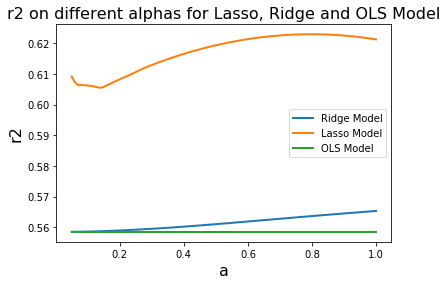

In [54]:
import matplotlib.pyplot as plt

OLS = []
Ridge = []
Lasso = []

OLSModel = OLSRegression()
RidgeModel = RidgeRegression()
LassoModel = LassoRegression()

#get r2 by looping over alphas for each model
alphas = np.linspace(0.05, 1, 100)
for a in alphas:
    OLSModel.fit(x_train,y_train)
    score = OLSModel.score(x_test,y_test)
    OLS.append(score)
    RidgeModel.set_params(alpha=a)
    RidgeModel.fit(x_train,y_train)
    score = RidgeModel.score(x_test,y_test)
    Ridge.append(score)
    LassoModel.set_params(alpha=a)
    LassoModel.fit(x_train,y_train)
    score = LassoModel.score(x_test,y_test)
    Lasso.append(score)

plt.plot(alphas, Ridge, lw=2, ls='-', label= r'Ridge Model')
plt.plot(alphas, Lasso, lw=2, ls='-', label= r'Lasso Model')
plt.plot(alphas, OLS, lw=2, ls='-', label=r'OLS Model')

#display legend and define axises & plot title
plt.legend() 
plt.xlabel(r'a', fontsize=16) 
plt.ylabel(r'r2', fontsize=16) 
plt.title('r2 on different alphas for Lasso, Ridge and OLS Model', fontsize=16)
plt.show()